#### Assigment 4: Clustering Methods
#### Ryan Martin 6/13

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist, pdist
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/"
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"]
df = pd.read_csv(url + "iris.data", header=None, names=names)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
def name2num(x):
    if x == "Iris-setosa":
        return 0
    if x == "Iris-versicolor":
        return 1
    if x == "Iris-virginica":
        return 2
df_target = df['Name'].apply(name2num)  

## 1.1 Clustering Data withk-Means

#### Plot a scatter plot matrix between all features (see pandas.plotting.scattermatrix).Use  the  “Name”  column  to  color  the  points.   Note  that  you  may  have  to  convert  the“Name” column into integers to use it for specifying the plot colors (see the ‘c’ parame-ter).  Resize the plot as needed.  Do the three classes appear to be equally well-separatedor is one more different than the others?

#### Answer: From the scatter matrix below, and the additional matrix and scatterplot provided, it is apparent that some classes are more well seperated than others. There is definitely more "good clustering" between the features Petal Width and Petal Length because there is more high intra-class and low inter-class similiarity, unlike the Sepal Width and Sepal Length that have low intra-class and high inter-class similairity and are less distinguishable in the scatter plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f908a20>,
      dtype=object)

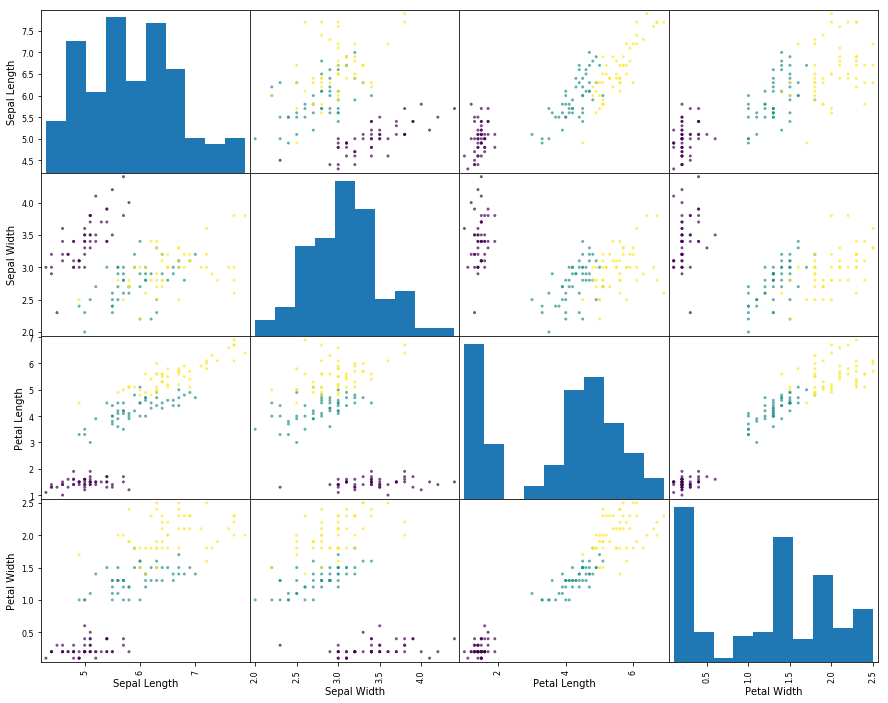

In [4]:
scatter_matrix(df, alpha=0.7, c=df_target, figsize=(15, 12))

#### Answer: This matrix provides the same data only with more clarity. 

<Figure size 720x432 with 0 Axes>

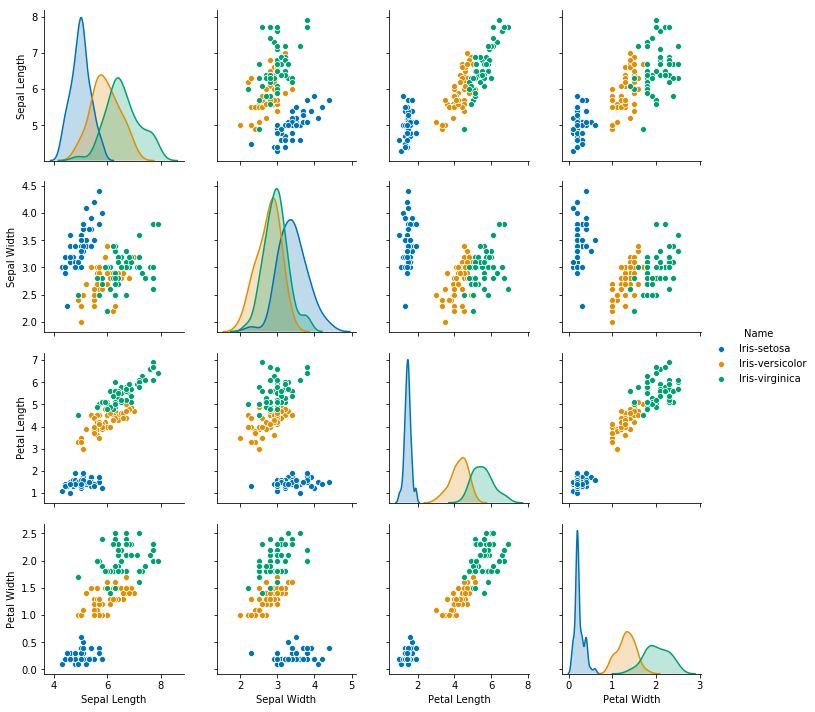

In [5]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='Name', palette='colorblind')

#### These lmplots show the difference in good clustering vs. bad clustering. 

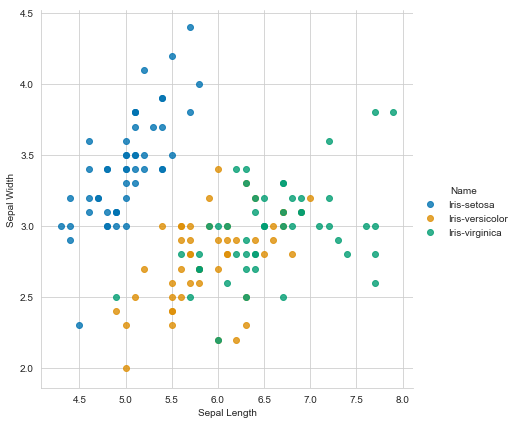

In [6]:
sns.set_style('whitegrid')
sns.lmplot('Sepal Length','Sepal Width',data=df, hue='Name',
           palette='colorblind',height=6,aspect=1,fit_reg=False)

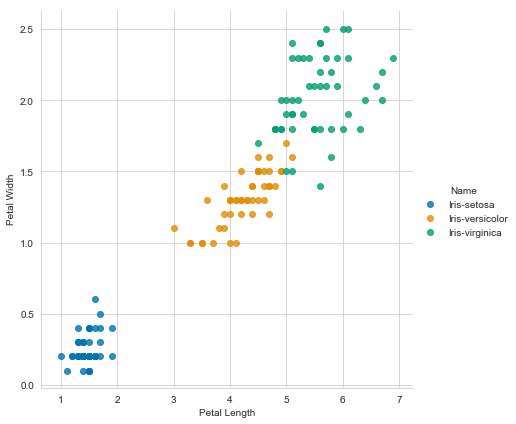

In [7]:
sns.set_style('whitegrid')
sns.lmplot('Petal Length','Petal Width',data=df, hue='Name',
           palette='colorblind',height=6,aspect=1,fit_reg=False)

#### Cluster the the data usingk-Means clustering (see sklearn.cluster.KMeans).  Form3 clusters (nclusters=3), with the four features as the input data, and plot the resultingclusters as a 2D scatter plot.  Use “Petal Length” for thex-axis of the plot and “PetalWidth” for they-axis, with each point colored according to its assigned cluster label.

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=3)

In [10]:
X_iris = df.drop(columns=['Name'], axis=1)
y_iris = df_target


kmeans.fit(X_iris)

y_pred = kmeans.predict(X_iris)

In [11]:
def num2name_y(x):
    if x == 0:
        return "Iris-versicolor"
    if x == 1:
        return "Iris-setosa"
    if x == 2:
        return "Iris-virginica"
y_pred_name = [num2name_y(x) for x in list(y_pred)]

In [12]:
def num2name_df(x):
    if x == 0:
        return "Iris-setosa"
    if x == 1:
        return "Iris-versicolor"
    if x == 2:
        return "Iris-virginica"
df_target_name = [num2name_df(i) for i in list(df_target)]

#### Answer: Below I have provided seaborn scatterplots for clarity. 

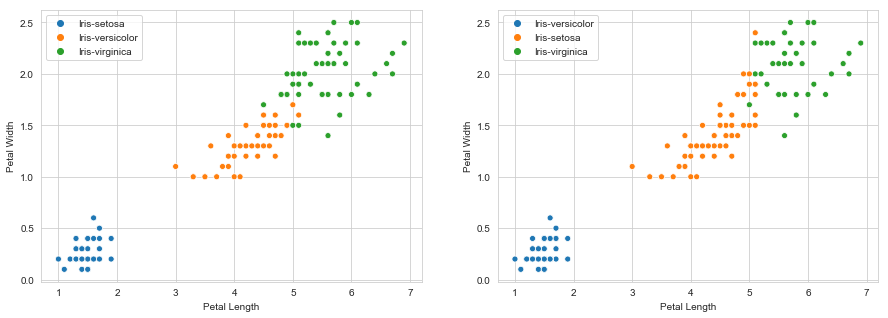

In [13]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(df['Petal Length'], df['Petal Width'], hue = df_target_name, ax = ax[0])
sns.scatterplot(df['Petal Length'], df['Petal Width'], hue = y_pred_name, ax = ax[1])

#### Show the cross-tabulation (see pandas.crosstab) of the actual class values and thecluster labels.  How many instances belong to an incorrect cluster?  Do any of the clusterlabels correspond perfectly to a class label?  Do these observations agree with what youobserved from the scatter plot matrix?

#### Answer: According to this crosstab table below, there were 14 instances of Iris-versicolor in the predictive K-means clustering model that were actually labeled as Iris-virginica, and 2 Iris-virginica instances that were actually labeled Iris-versicolor. The clusterlabels do correspond to the class label, after some list manipulation. The crosstab does match what the scatterplot portrays, which is that the Iris_setosa was predicted with 100% accuracy, and the other classes were predicted mostly correctly by K-means clustering algorithm. 

In [14]:
crosstab = pd.crosstab(y_pred, df_target, margins=True)
crosstab

Name,0,1,2,All
row_0,,,,
0,50,0,0,50
1,0,48,14,62
2,0,2,36,38
All,50,50,50,150


#### Answer: This heatmap shows a more colorful visualization of the crosstab data.

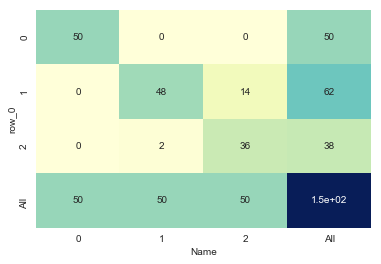

In [15]:
sns.heatmap(crosstab, cmap="YlGnBu", annot=True, cbar=False)

## 1.2 Hierarchical Clustering of Features

#### To assess how similar the features are, calculate the mutual information betweenall pairs of features (see sklearn.featureselection.mutualinforegression); that is, use eachfeature as the target variable once in the calculation.  Create a DataFrame from the outputand label the indices and columns of the DataFrame with the appropriate feature names.

In [16]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [17]:
df_clean = df.drop(columns=['Name'], axis=1)
df_clean.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
for i in list(df_clean):
    print(mutual_info_regression(df_clean.drop([i], axis = 1), df_clean[i], random_state = None))

[0.28655255 0.90273753 0.59347958]
[0.29977525 0.35237471 0.42043952]
[0.87280044 0.36306511 1.19463431]
[0.62134089 0.40261165 1.21882138]


In [19]:
#Create X and y target values for mutual info regression on features

X_petal_width = df_clean #.iloc[:, :-1]
y_petal_width = df_clean.iloc[:,-1]

X_petal_length = df_clean #.iloc[:, :-2].join(df_clean.iloc[:,-1])
y_petal_length = df_clean.iloc[:, -2]

X_sepal_width = df_clean #.iloc[:, :-3].join(df_clean.iloc[:, 2:])
y_sepal_width = df_clean.iloc[:, -3]

X_sepal_length = df_clean #.iloc[:, 1:]
y_sepal_length = df_clean.iloc[:, -4]

# Calculate mutual info regression 
mi_petal_width = mutual_info_regression(X_petal_width, y_petal_width, random_state=None)
mi_petal_length = mutual_info_regression(X_petal_length, y_petal_length, random_state=None)
mi_sepal_width = mutual_info_regression(X_sepal_width, y_sepal_width, random_state=None)
mi_sepal_length = mutual_info_regression(X_sepal_length, y_sepal_length, random_state=None)

# Put mutual info regression into lists
petal_width_list = list(mi_petal_width)
petal_length_list = list(mi_petal_length)
sepal_width_list = list(mi_sepal_width)
sepal_length_list = list(mi_sepal_length)

# Fill zeros for missing data
#petal_width_list.append(0)
#petal_length_list.insert(2, 0)
#sepal_width_list.insert(1, 0)
#sepal_length_list.insert(0, 0)

iris_reg = sepal_length_list, sepal_width_list, petal_length_list, petal_width_list

iris = [x for x in iris_reg]

iris

[[3.186638260601551,
  0.2908759116146791,
  0.8834278398059823,
  0.6428935773013951],
 [0.30890317545997403,
  2.717917781877203,
  0.36397427245480163,
  0.4239039537220144],
 [0.8949275348873758,
  0.35918363087126837,
  3.185688525151816,
  1.2840593255341828],
 [0.6273708324234524,
  0.40492274098482683,
  1.221907069654073,
  2.754153724583733]]

#### Answer: This dataframe below shows the mutual information regression of all the feature pairs.  

In [20]:
df_regression = pd.DataFrame(iris, [x for x in list(df_clean)],[x for x in list(df_clean)])
df_regression

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.186638,0.290876,0.883428,0.642894
Sepal Width,0.308903,2.717918,0.363974,0.423904
Petal Length,0.894928,0.359184,3.185689,1.284059
Petal Width,0.627371,0.404923,1.221907,2.754154


In [21]:
list(df_regression.index)

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

#### Create a dendrogram from the mutual information DataFrame.  According to thedendrogram, which pair of features are most similar?  Which feature is most unlike theothers?  You may use the following function to generate the dendrogram, which takes asinput the fit cluster model; you can pass the feature names with thelabelsparameter.

#### Answer: To begin the process of finding which pair of features are most similiar by generating  a dendrogram, I created a model using the mutual regression information data and fit that model with agglomerative heirarchial clustering. Agglomerative hierarchical clustering recursively merges the closest pair of clusters that minimally increases a defined "linkage" distance criterion, which helps in determining the distance between sets of observations as a function of the pairwise distances between observations.

In [22]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(df_regression)

#### Answer: I then plotted the agglomerative clustering model with the mutual regession data in a dendrogram. 

In [23]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

#### Answer: According to this dendrogram below, the Petal Width and Petal Length are most similiar because they are directly connected as children features. This creates "good clustering" in the scatter plot with high intra-class and low inter-class similiarity, unlike the Sepal Width and Sepal Length that have low intra-class and high inter-class similairity and are less distinguishable in the scatter plot and dendrogram. This dendrogram basically illustrates the reason why Sepal Width and Sepal Length were not the features chosen to run the K-means clustering algorithm that provided a predictive model that classified the instances based on features. It would be highly inaccurate to choose features such as Sepal Width and Sepal Length to fit into a predictive model like K-means. 

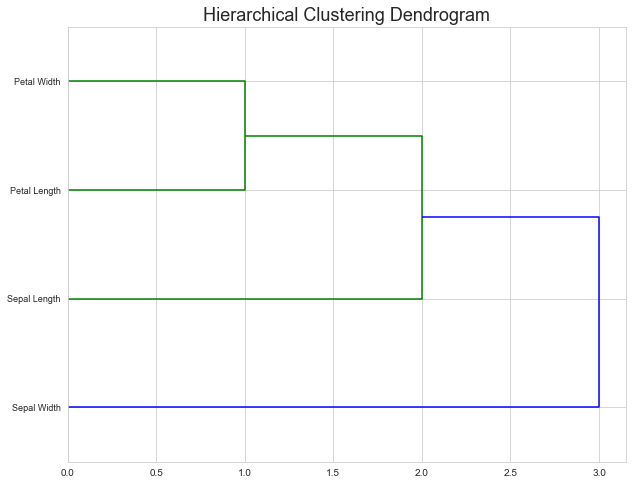

In [24]:
figure = plt.figure(figsize=(10, 8))
labels = list(df_regression.index)
plt.title("Hierarchical Clustering Dendrogram", fontsize=18)
plot_dendrogram(model, labels=labels, orientation='right', leaf_font_size=9)
plt.show()

#### A cluster map of the mutual information regression data visualizes the similiarities between the features "Petal Width" and "Petal Length"

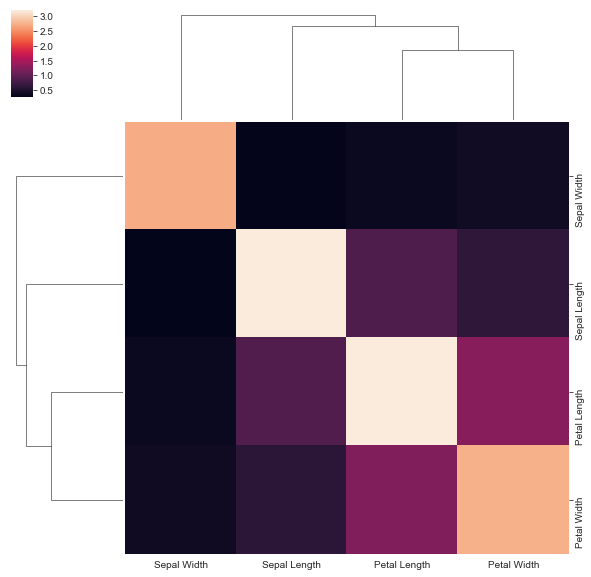

In [25]:
sns.clustermap(df_regression)

#### Extension: I have provided some additional visualizations with plotly for this assignmnet. 

In [26]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

print(__version__) # requires version >= 1.9.0


3.10.0


In [27]:
import cufflinks as cf

In [28]:
# For Notebooks
init_notebook_mode(connected=True)

In [29]:
# For offline use
cf.go_offline()

In [30]:
df.iplot(kind='box')

In [31]:
df_regression.iplot(kind='heatmap')